#### Feature transformers
- transformations which are applied on columns values 
- some transformations are 
- - log transformation (fxn transformer)
- - reciprocal transformer (fxn transformers)
- - power transformer - sqrt or cube root (fxn transformers)
- - Box cox (Power transformer)
- - Yeo Johnson (Power transformer)

these transformations converts our data into normal distributions because normal distributions favours statistics 
some ml alog best on normal distribution are linear regression, logistic regression

##### Function tranformations

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer




In [2]:
df = pd.read_csv('../02 Ml pipeline/train.csv')

In [3]:
df = df[['Age', 'Fare', 'Survived']]

In [4]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [5]:
df.isna().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\rajar\AppData\Local\Temp\ipykernel_13648\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [7]:
x = df.drop(columns=['Survived'])
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

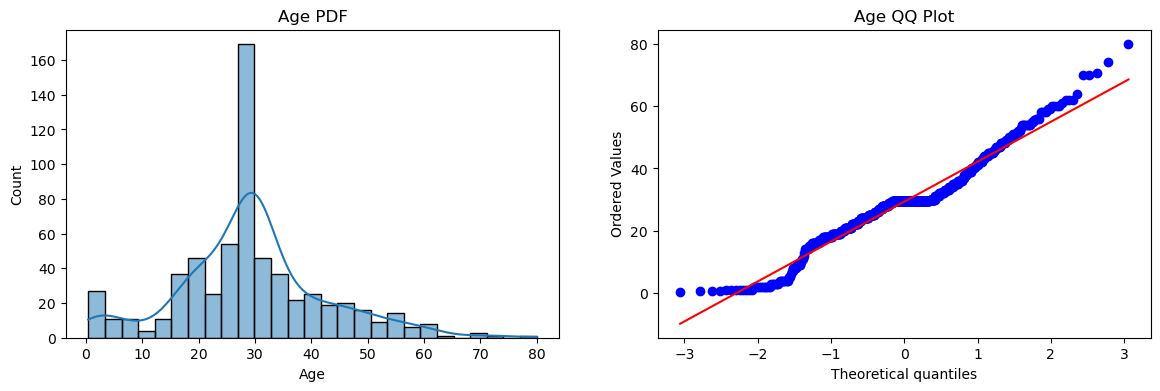

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt) #QQPlot for
#for perfect normal plot QQ plot is a straight line distribution
plt.title('Age QQ Plot')

plt.show()

Text(0.5, 1.0, 'AQQ plot')

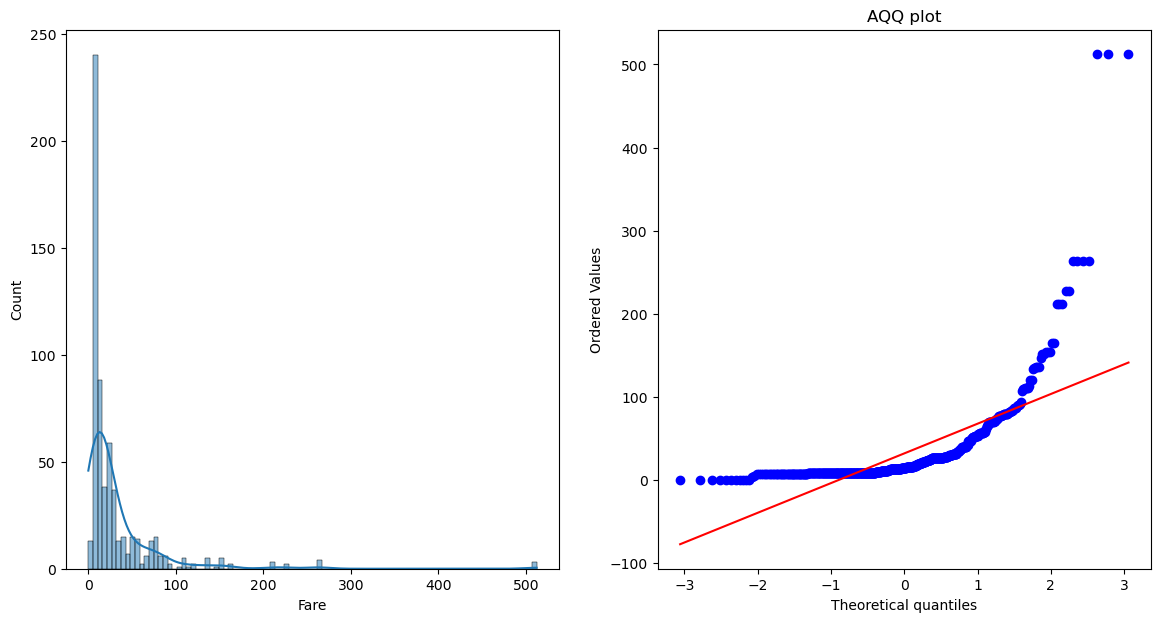

In [9]:
plt.figure(figsize=(14, 7))
plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True)

plt.subplot(122)
stats.probplot(x_train['Fare'],dist="norm", plot=plt)
plt.title("AQQ plot")

In [23]:
def fare_trans(fxn):
    x = df.drop(columns=['Survived'])
    y = df['Survived']

    trf = ColumnTransformer(
        transformers = [
            ('custom', FunctionTransformer(fxn),['Fare'] )
        ],
        remainder='passthrough'
    ) 
    trf.set_output(transform="pandas")
    x_trans = trf.fit_transform(x)

    plt.figure(figsize=(14, 14))
    #2*2 ka first 1 -> 2, 2, 1 or 221
    plt.subplot(221)
    sns.histplot(x['Fare'], kde=True)
    plt.title("Fare before transformation")

    plt.subplot(222)
    sns.histplot(x_trans['custom__Fare'], kde=True)
    plt.title("Fare after transformation")

    plt.subplot(223)
    stats.probplot(x['Fare'],dist="norm",plot=plt)
    plt.title("AQQ before transformation")
     
    plt.subplot(224)
    stats.probplot(x_trans['custom__Fare'],dist="norm",plot=plt)
    plt.title("AQQ fater transformation")


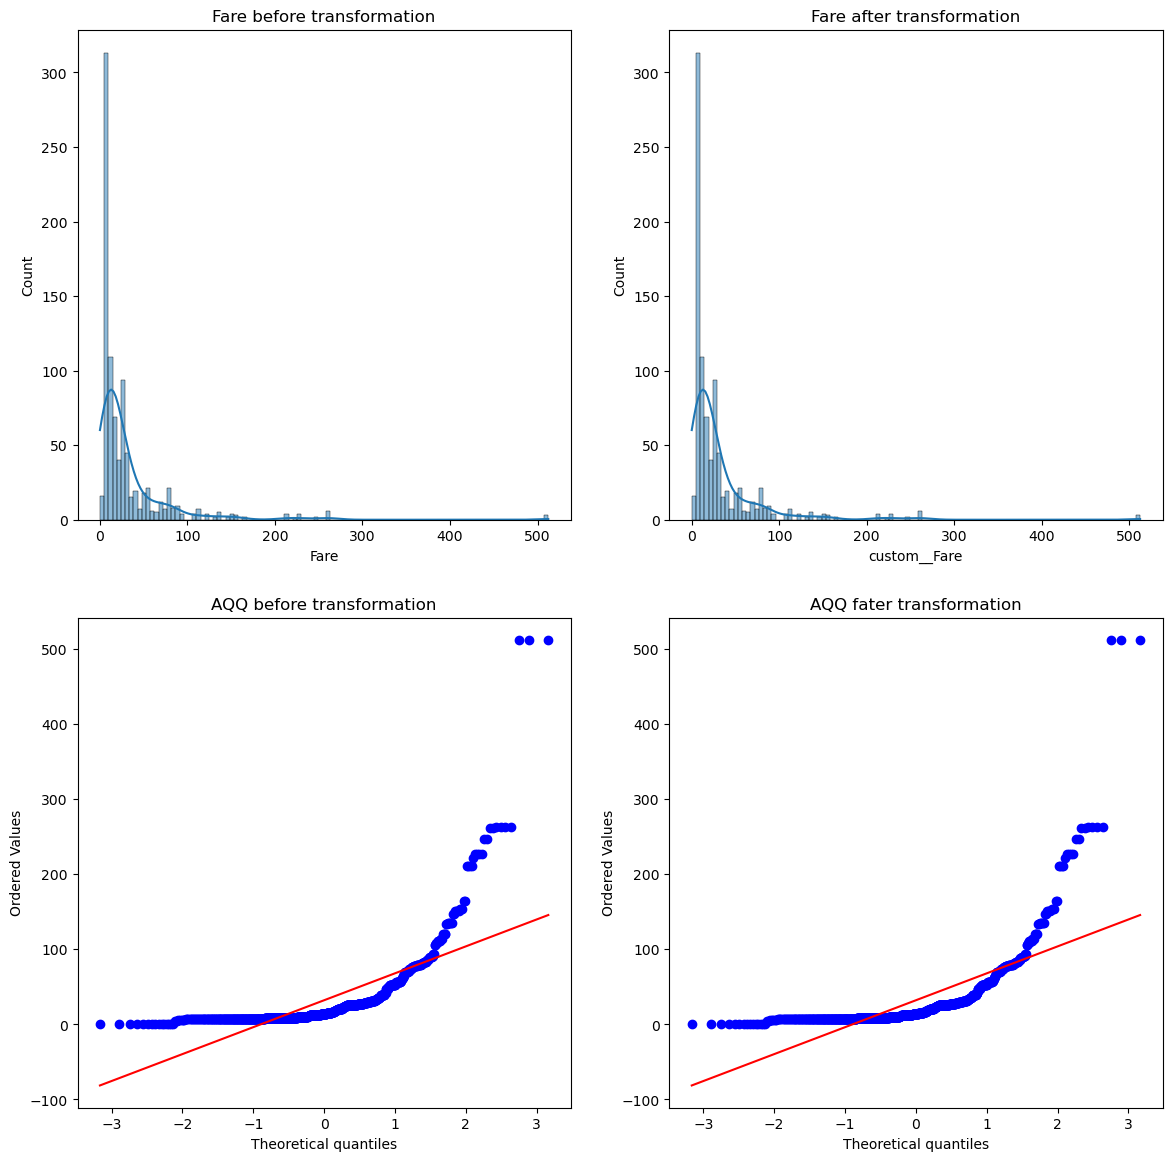

In [24]:
fare_trans(lambda x : x)

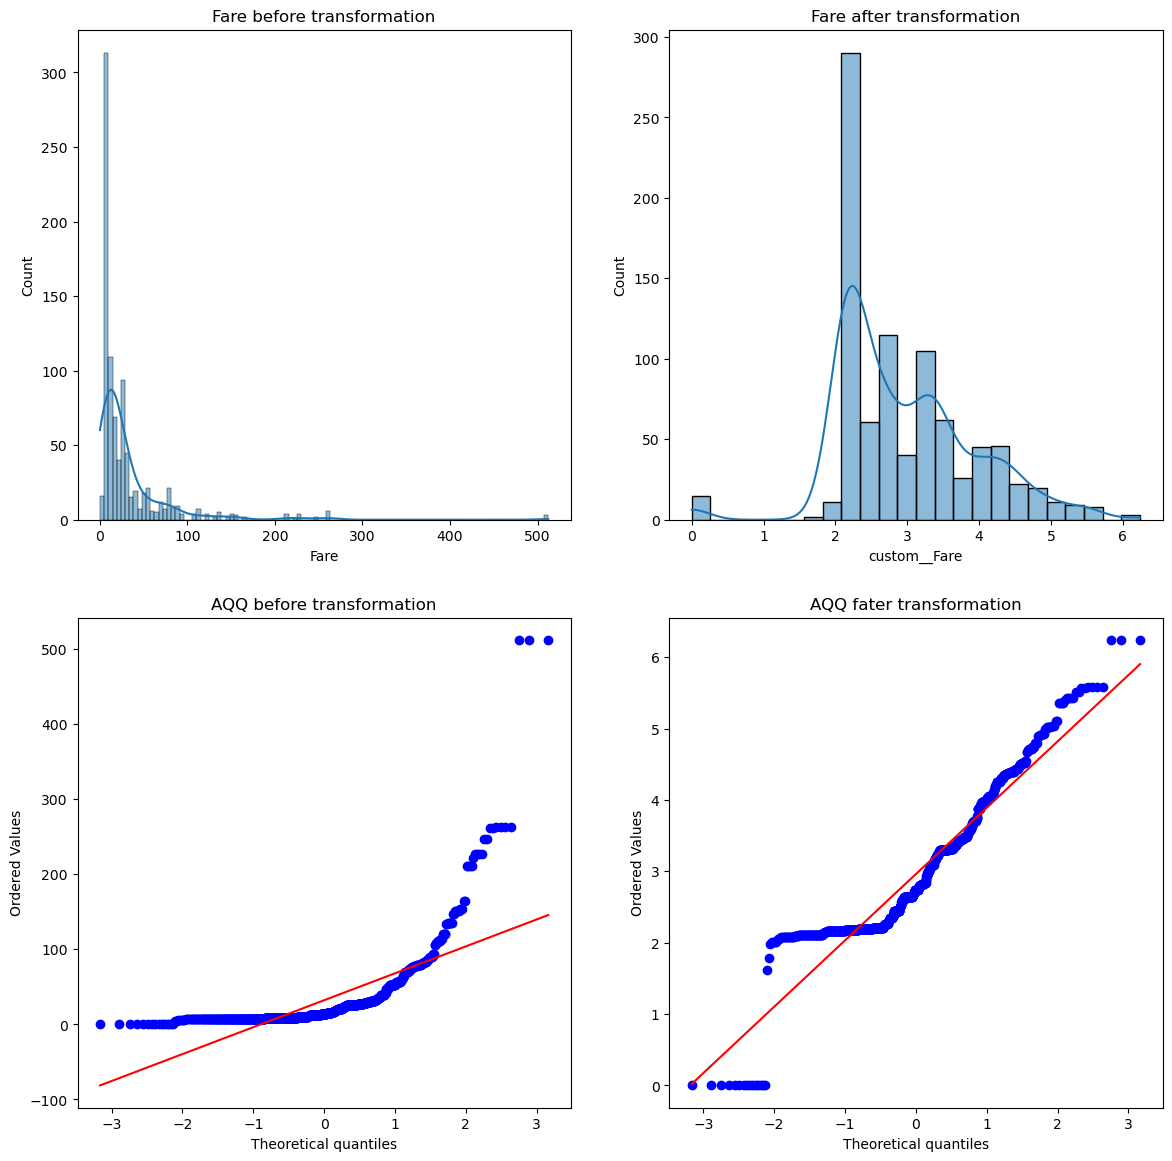

In [ ]:
fare_trans(np.log1p) #np.log1p is for log(1+x) no avoid zero
                    #log works best for right skewed data 
                    # ye bhot baadi value ko kaam kr deta hai aur choti ko jyda chota naa karta

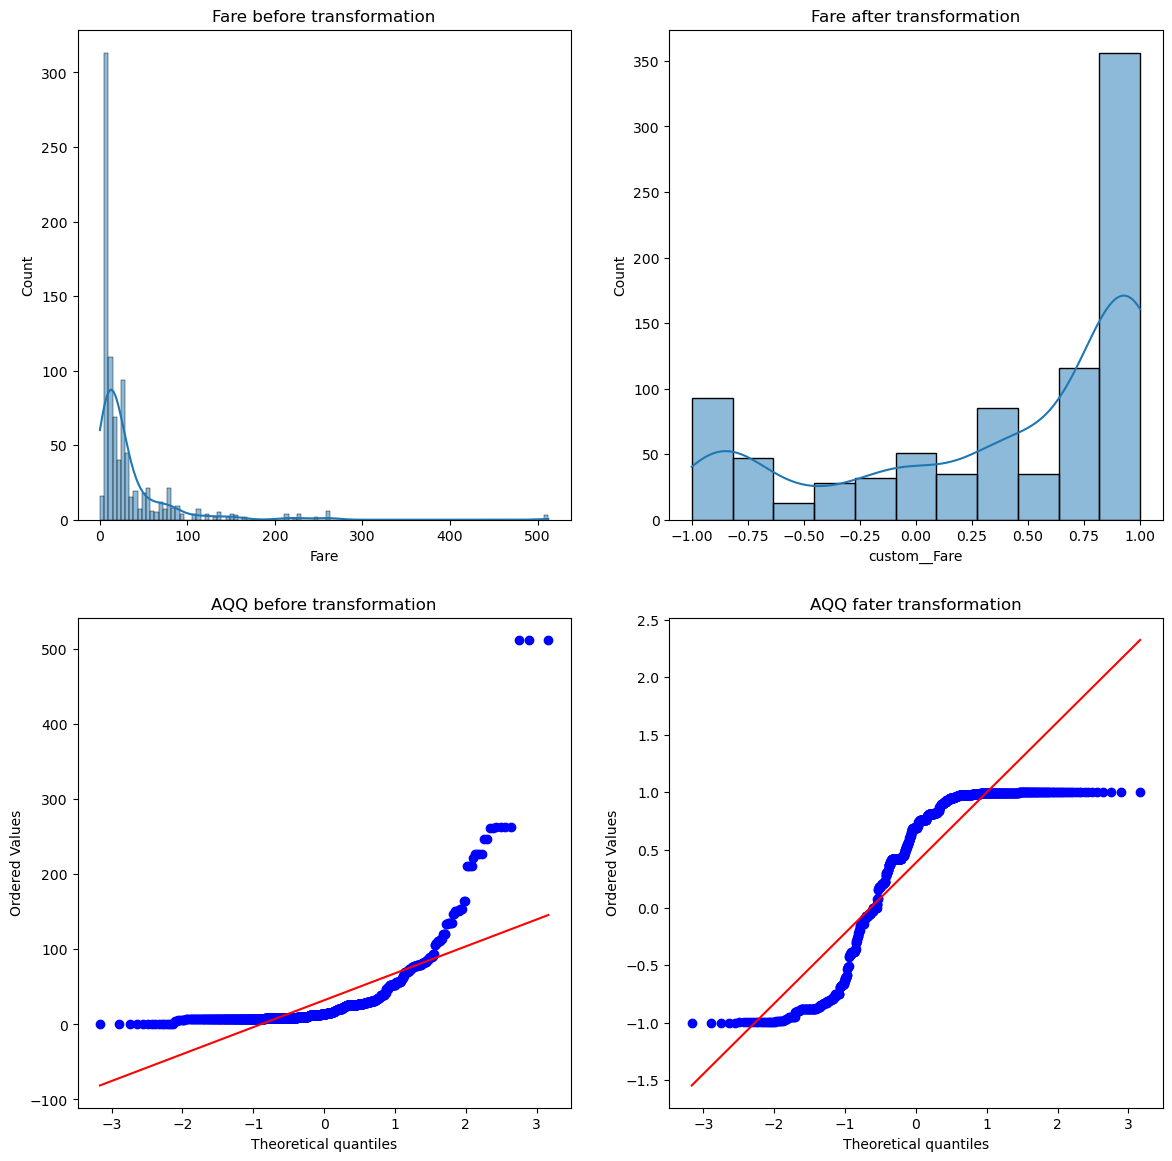

In [26]:
fare_trans(np.sin)